### Model 1: Logistic Regression

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train=pd.read_csv('train.csv',usecols=[0,3,4])
test=pd.read_csv('test.csv',usecols=[0,3])

In [ ]:
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3263 non-null   int64 
 1   text    3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [ ]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [ ]:
x=train['text']
y=train['target']

In [ ]:
x=x.apply(lambda x: clean_text(x))
test['text']=test['text'].apply(lambda x: clean_text(x))

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
x=x.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text']=test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

C: 1.0
val_error: 0.1969796454366382
C: 1.0
val_error: 0.1969796454366382
C: 0.5
val_error: 0.20748522652659226
C: 2.0
val_error: 0.18844386080105055
C: 4.0
val_error: 0.18319107025607353
C: 8.0
val_error: 0.18844386080105055
C: 3.0
val_error: 0.18647406434668418
C: 3.5
val_error: 0.1871306631648063


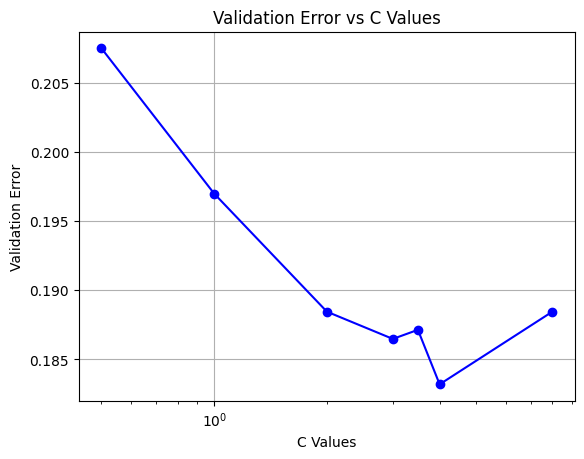

Best C value: 4.0
Validation Error with Best C value: 0.18319107025607353
Second best C value: 3.0
Validation Error with second best C value: 0.18647406434668418


In [ ]:
# Try multiple C parameters, select one that minimizes validation error
# Often, you need to try a few values and see those results to determine what other values to try

def calc_error(C):
  # Train linear SVM
  c=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=C,solver='sag',max_iter=100))])
  c.fit(x_train,y_train)

  # Evaluate on validation set
  val_pred = c.predict(x_val)
  val_error = np.mean(val_pred != y_val)
  print('C: ' + str(C))
  print('val_error: ' + str(val_error))
  return val_error

# start with 1
# Values of C to try0.015625, 0.03125, 0.0625, 0.125,
C_values = [1.0]

# Track validation errors for each C value
val_errors = [calc_error(1.0)]
least_error = calc_error(1.0)
second_least_error = float('inf')
best_C = 1.0
second_best_C = 0

while True:

  if best_C/2 in C_values and best_C*2 in C_values:
    new_C = (best_C + second_best_C)/2
    if new_C in C_values:
      break
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if best_C/2 not in C_values:
    new_C = best_C/2
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if best_C*2 not in C_values:
    new_C = best_C*2
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if abs(least_error - second_least_error)*100 < 0.1:
    break

# Plot validation error for each C value
plt.semilogx(C_values, val_errors, marker='o', linestyle='-', color='b')
plt.xlabel('C Values')
plt.ylabel('Validation Error')
plt.title('Validation Error vs C Values')
plt.grid(True)
plt.show()

# Report the best C value and its corresponding validation error
print("Best C value:", best_C)
print("Validation Error with Best C value:", least_error)

print("Second best C value:", second_best_C)
print("Validation Error with second best C value:", second_least_error)

In [ ]:
c=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=best_C,solver='sag',max_iter=1000))])
c.fit(x_train,y_train)

training_score = c.score(x_train,y_train)
testing_score = c.score(x_val,y_val)
print(training_score)
print(testing_score)

y_pred_tfidf=c.predict(x_val)
print(confusion_matrix(y_val,y_pred_tfidf))
print(classification_report(y_val,y_pred_tfidf))


0.9625615763546798
0.8168089297439265
[[752 117]
 [162 492]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       869
           1       0.81      0.75      0.78       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



## Additional Analysis

Text(0.5, 1.0, 'Training size vs Validation error (Logistic Regression)')

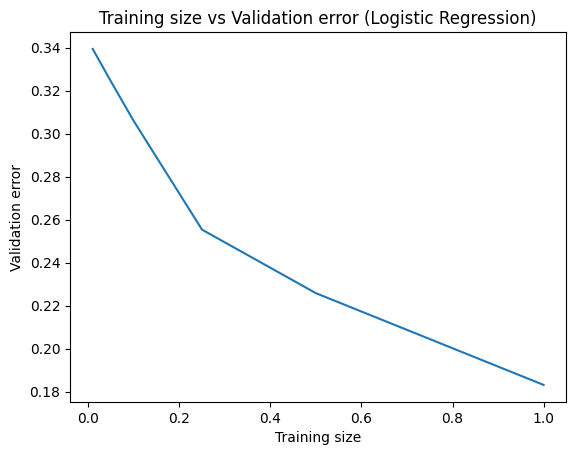

In [ ]:
sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
val_scores = []

for size in sizes:
  x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2, train_size=size*0.8,random_state=42,shuffle=True,stratify=y)
  c=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=best_C,solver='sag',max_iter=1000))])
  c.fit(x_train,y_train)

  val_score = c.score(x_val,y_val)
  val_scores.append(val_score)

plt.plot(sizes, 1-np.array(val_scores))
plt.xlabel('Training size')
plt.ylabel('Validation error')
plt.title('Training size vs Validation error (Logistic Regression)')

### Model 2 - SVM Linear SVC

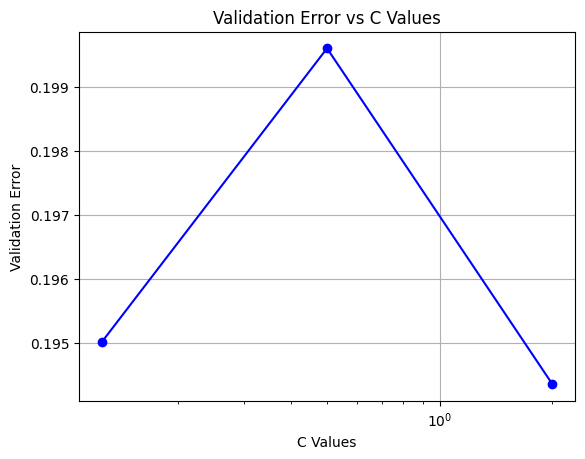

Best C value: 2.0
Validation Error with Best C value: 0.1943532501641497
Second best C value: 1.0
Validation Error with second best C value: 0.19500984898227183


In [ ]:
# Try multiple C parameters, select one that minimizes validation error
# Often, you need to try a few values and see those results to determine what other values to try
# from sklearn import LinearSVC
from sklearn.svm import LinearSVC

def calc_error(C):
  # Train linear SVM
  c = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))), ('model', LinearSVC(C = C, max_iter = 1000, random_state = 42))])
  c.fit(x_train,y_train)

  # Evaluate on validation set
  val_pred = c.predict(x_val)
  val_error = np.mean(val_pred != y_val)
  return val_error

# start with 1
# Values of C to try0.015625, 0.03125, 0.0625, 0.125,
C_values = [0.125]

# Track validation errors for each C value
val_errors = [calc_error(1.0)]
least_error = calc_error(1.0)
second_least_error = float('inf')
best_C = 1.0
second_best_C = 0

while True:

  if best_C/2 in C_values and best_C*2 in C_values:
    new_C = (best_C + second_best_C)/2
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if best_C/2 not in C_values:
    new_C = best_C/2
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if best_C*2 not in C_values:
    new_C = best_C*2
    new_error = calc_error(new_C)
    C_values.append(new_C)
    val_errors.append(new_error)
    val_errors = [x for _,x in sorted(zip(C_values, val_errors))]
    C_values.sort()

    if new_error < least_error:
      second_least_error = least_error
      second_best_C = best_C
      least_error = new_error
      best_C = new_C
    elif new_error < second_least_error:
      second_least_error = new_error
      second_best_C = new_C

  if abs(least_error - second_least_error)*100 < 0.1:
    break

# Plot validation error for each C value
plt.semilogx(C_values, val_errors, marker='o', linestyle='-', color='b')
plt.xlabel('C Values')
plt.ylabel('Validation Error')
plt.title('Validation Error vs C Values')
plt.grid(True)
plt.show()

# Report the best C value and its corresponding validation error
print("Best C value:", best_C)
print("Validation Error with Best C value:", least_error)

print("Second best C value:", second_best_C)
print("Validation Error with second best C value:", second_least_error)

In [ ]:
from sklearn.svm import LinearSVC

linearSVC = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))), ('model', LinearSVC(C = best_C, max_iter = 1000, random_state = 42))])
linearSVC.fit(x_train, y_train)

training_svc_score = linearSVC.score(x_train, y_train)
testing_svc_score = linearSVC.score(x_val, y_val)

print("Training Linear SVC Score", training_svc_score)
print("Testing SVC Score", testing_svc_score)

y_pred_svc = linearSVC.predict(x_val)
print(confusion_matrix(y_val,y_pred_svc))
print(classification_report(y_val,y_pred_svc))


Training Linear SVC Score 0.9957307060755337
Testing SVC Score 0.8056467498358503
[[718 151]
 [145 509]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       869
           1       0.77      0.78      0.77       654

    accuracy                           0.81      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



Text(0.5, 1.0, 'Training size vs Validation error (LinearSVC)')

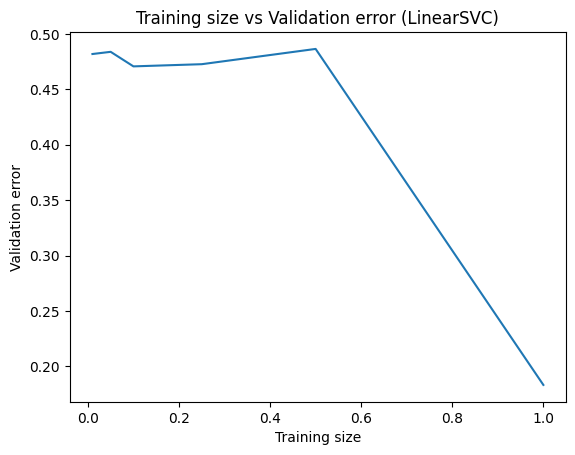

In [ ]:
sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
val_scores = []

for size in sizes:
  x_train,x_val,y_train,y_test = train_test_split(x,y,test_size=0.2, train_size=size*0.8,random_state=42,shuffle=True,stratify=y)
  linearSVC = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))), ('model', LinearSVC(C = best_C, max_iter = 1000, random_state = 42))])
  linearSVC.fit(x_train,y_train)

  val_score = c.score(x_val,y_val)
  val_scores.append(val_score)

plt.plot(sizes, 1-np.array(val_scores))
plt.xlabel('Training size')
plt.ylabel('Validation error')
plt.title('Training size vs Validation error (LinearSVC)')

# Model 3: Random Forest Classifier

(1523,)
(1523,)
Model with No of Estimators: 1
0.6894287590282338
[[653 216]
 [257 397]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       869
           1       0.65      0.61      0.63       654

    accuracy                           0.69      1523
   macro avg       0.68      0.68      0.68      1523
weighted avg       0.69      0.69      0.69      1523

(1523,)
(1523,)
Model with No of Estimators: 50
0.7839789888378201
[[808  61]
 [268 386]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       869
           1       0.86      0.59      0.70       654

    accuracy                           0.78      1523
   macro avg       0.81      0.76      0.77      1523
weighted avg       0.80      0.78      0.78      1523

(1523,)
(1523,)
Model with No of Estimators: 100
0.7866053841103086
[[813  56]
 [269 385]]
              precision    recall  f1-score   support

           0       0.

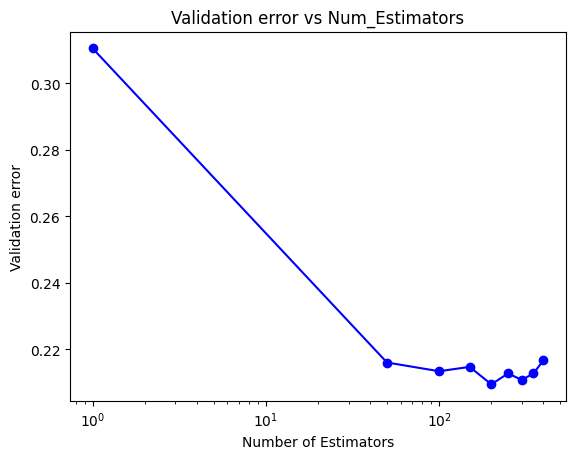

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

accuracies = []
for i in [1, 50, 100, 150, 200, 250, 300, 350, 400]:
  nb = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))), ('model', RandomForestClassifier(random_state=42, n_estimators=i))])

  nb.fit(x_train, y_train)
  print(x_val.shape)
  print(y_val.shape)

  y_pred = nb.predict(x_val)
  correct = np.sum(np.array(y_pred) == np.array(y_val))
  print(f'Model with No of Estimators: {i}')
  print(correct / len(y_val))
  print(confusion_matrix(y_val, y_pred))
  print(classification_report(y_val,y_pred))
  accuracies.append(correct / len(y_val))

# Plot validation error for each C value
plt.semilogx([1, 50, 100, 150, 200, 250, 300, 350, 400], 1-np.array(accuracies), marker='o', linestyle='-', color='b')
plt.xlabel('Number of Estimators')
plt.ylabel('Validation error')
plt.title('Validation error vs Num_Estimators')
plt.show()

# Additional Analysis

(7613,)
(7613,)
(1523,)
(1523,)
Model with Training Size: 0.01
(1523,)
(1523,)
Model with Training Size: 0.05
(1523,)
(1523,)
Model with Training Size: 0.1
(1523,)
(1523,)
Model with Training Size: 0.25
(1523,)
(1523,)
Model with Training Size: 0.5
(1523,)
(1523,)
Model with Training Size: 1.0


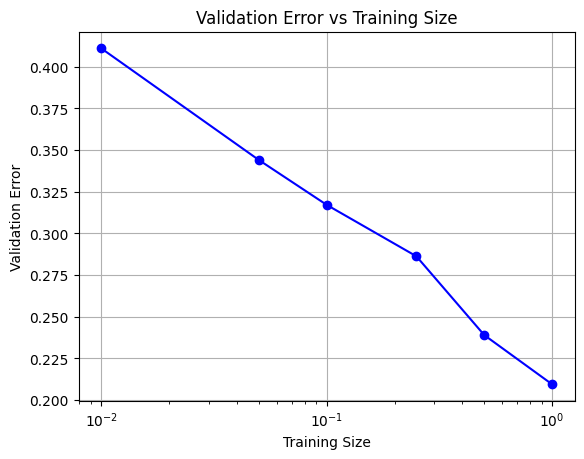

In [ ]:
sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]

print(x.shape)
print(y.shape)

accuracies = []
errors = []

for size in sizes:
  x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, train_size=size*0.8,random_state=42,shuffle=True,stratify=y)
  nb = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,2))), ('model', RandomForestClassifier(random_state=42, n_estimators=200))])

  nb.fit(x_train, y_train)

  y_pred = nb.predict(x_val)
  print(x_val.shape)
  print(y_val.shape)
  correct = np.sum(np.array(y_pred) == np.array(y_val))
  print(f'Model with Training Size: {size}')
  accuracies.append(correct / len(y_val))
  errors.append(1.0 - (correct / len(y_val)))

# Plot validation error for each C value
plt.semilogx(sizes, errors, marker='o', linestyle='-', color='b')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.title('Validation Error vs Training Size')
plt.grid(True)
plt.show()


#Model 4: KNeighborsClassifier





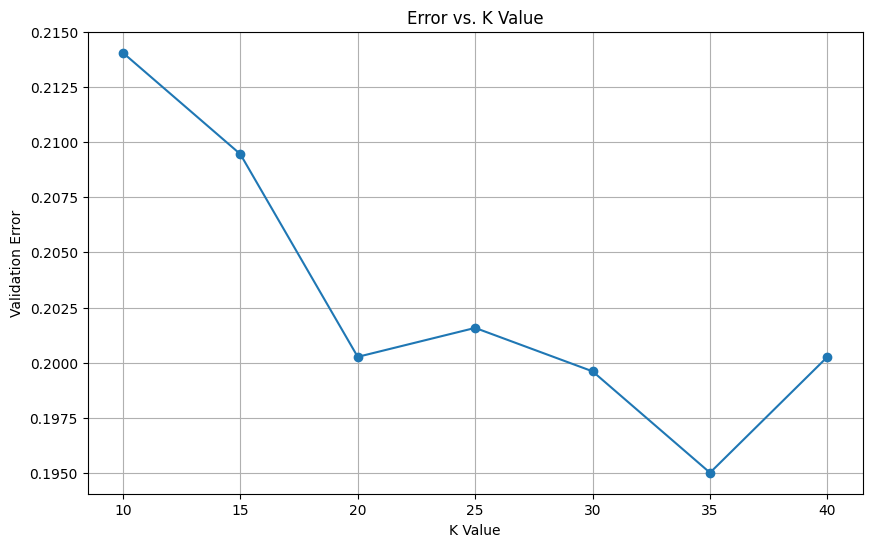

0.8089297439264609


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

k_values = [10, 15, 20, 25, 30, 35, 40]
accuracy_scores = []
for k in k_values:
    # Create KNeighborsClassifier pipeline
    knn_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('model', KNeighborsClassifier(n_neighbors=k))
    ])
    knn_pipeline.fit(x_train, y_train)
    y_pred_val = knn_pipeline.predict(x_val)


    accuracy = accuracy_score(y_val, y_pred_val)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, 1-np.array(accuracy_scores), marker='o', linestyle='-')
plt.title('Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Validation Error')
plt.grid(True)
plt.xticks(k_values)
plt.show()

# hyperparameter
best_k = k_values[np.argmax(accuracy_scores)]

X_train_union = pd.concat([x_train, x_val], axis=0)
y_train_union = pd.concat([y_train, y_val], axis=0)
best_knn_model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('model', KNeighborsClassifier(n_neighbors=best_k))
])
best_knn_model.fit(X_train_union, y_train_union)

y_pred_test = best_knn_model.predict(x_val)
test_accuracy = accuracy_score(y_val, y_pred_test)

print(test_accuracy)

  Training Size  Validation Accuracy
0          1.0%             0.559113
1          5.0%             0.652709
2         10.0%             0.698686
3         25.0%             0.727422
4         50.0%             0.756158
5        100.0%             0.776683


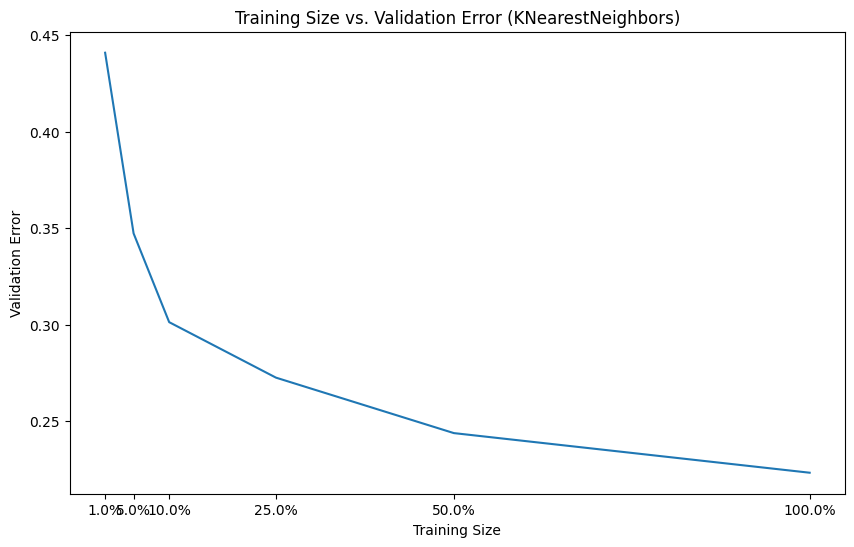

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]

accuracy_scores = []

for size in train_sizes:
    X_train_partial, X_val_partial, y_train_partial, y_val_partial = train_test_split(x_train, y_train, test_size=0.2, train_size=size*0.8, random_state=42)

    knn_pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
        ('model', KNeighborsClassifier(n_neighbors=35))
    ])

    knn_pipeline.fit(X_train_partial, y_train_partial)
    y_pred_val = knn_pipeline.predict(X_val_partial)
    accuracy_scores.append(accuracy_score(y_val_partial, y_pred_val))


results_df = pd.DataFrame({
    'Training Size': [f'{size * 100}%' for size in train_sizes],
    'Validation Accuracy': accuracy_scores
})

print(results_df)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, 1-np.array(accuracy_scores), linestyle='-')
plt.title('Training Size vs. Validation Error (KNearestNeighbors)')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.xticks(train_sizes, [f'{size * 100}%' for size in train_sizes])
plt.show()

### Best Model and Hyperparameter

In [ ]:
c=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=4.0,solver='sag',max_iter=1000))])
c.fit(x,y)

submission=pd.DataFrame()
submission['id']=test['id']
submission['target']=c.predict(test['text'])
submission.to_csv('submission.csv',index=False)

Stretch Goal - Innovation

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
tweets_train = [tweet for tweet in x_train]

sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_analysis_train = sentiment_pipeline(tweets_train)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
tweets_val = [tweet for tweet in x_val]

sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_analysis_val = sentiment_pipeline(tweets_val)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
scores_train = []
i = 0
for tweet, result in zip(tweets_train, sentiment_analysis_train):
  if sentiment_analysis_train[i]['label'] == 'NEGATIVE':
    scores_train.append(sentiment_analysis_train[i]['score'] * -1)
  else:
    scores_train.append(sentiment_analysis_train[i]['score'])
  i+=1

In [ ]:
scores_val = []
i = 0
for tweet, result in zip(tweets_val, sentiment_analysis_val):
  if sentiment_analysis_val[i]['label'] == 'NEGATIVE':
    scores_val.append(sentiment_analysis_val[i]['score'] * -1)
  else:
    scores_val.append(sentiment_analysis_val[i]['score'])
  i+=1

In [ ]:
x_train_df = x_train.to_frame()
x_train_df['Scores'] = scores_train

In [ ]:
x_val_df = x_val.to_frame()
x_val_df['Scores'] = scores_val

In [ ]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(ngram_range=(1, 1)), 'text'),
        ('numeric', StandardScaler(), ['Scores'])
    ])

In [ ]:
sentiment_model = Pipeline([('preprocessor', column_transformer),('model',LogisticRegression(C=4.0, solver='sag',max_iter=1000))])
sentiment_model.fit(x_train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'text'),
                                                 ('numeric', StandardScaler(),
                                                  ['Scores'])])),
                ('model',
                 LogisticRegression(C=4.0, max_iter=1000, solver='sag'))])

In [ ]:
y_pred = sentiment_model.predict(x_val_df)

In [ ]:
accuracy = np.mean(np.array(y_pred)==np.array(y_val))
print(accuracy)

0.8168089297439265


Change to model -

In [ ]:
from transformers import pipeline
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
tweets_train = [tweet for tweet in x_train]

sentiment_pipeline = pipeline("sentiment-analysis", model = "cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_analysis_train = sentiment_pipeline(tweets_train)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
tweets_val = [tweet for tweet in x_val]

sentiment_pipeline = pipeline("sentiment-analysis", model = "cardiffnlp/twitter-roberta-base-sentiment-latest")
sentiment_analysis_val = sentiment_pipeline(tweets_val)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
scores_train = []
i = 0
for tweet, result in zip(tweets_train, sentiment_analysis_train):
  if sentiment_analysis_train[i]['label'] == 'NEGATIVE':
    scores_train.append(sentiment_analysis_train[i]['score'] * -1)
  else:
    scores_train.append(sentiment_analysis_train[i]['score'])
  i+=1

In [ ]:
scores_val = []
i = 0
for tweet, result in zip(tweets_val, sentiment_analysis_val):
  if sentiment_analysis_val[i]['label'] == 'NEGATIVE':
    scores_val.append(sentiment_analysis_val[i]['score'] * -1)
  else:
    scores_val.append(sentiment_analysis_val[i]['score'])
  i+=1

In [ ]:
x_train_df = x_train.to_frame()
x_train_df['Scores'] = scores_train

x_val_df = x_val.to_frame()
x_val_df['Scores'] = scores_val


In [ ]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(ngram_range=(1, 1)), 'text'),
        ('numeric', StandardScaler(), ['Scores'])
    ])

In [ ]:
sentiment_model = Pipeline([('preprocessor', column_transformer),('model',LogisticRegression(C=4.0, solver='sag',max_iter=1000))])
sentiment_model.fit(x_train_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text', TfidfVectorizer(),
                                                  'text'),
                                                 ('numeric', StandardScaler(),
                                                  ['Scores'])])),
                ('model',
                 LogisticRegression(C=4.0, max_iter=1000, solver='sag'))])

In [ ]:
y_pred = sentiment_model.predict(x_val_df)

In [ ]:
accuracy = np.mean(np.array(y_pred)==np.array(y_val))
print(accuracy)

0.8082731451083388
